In [1]:
from Class_PINN_FBPINN import *
import matplotlib.pyplot as plt
import pickle

c:\Users\C097\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on  cuda


In [2]:
torch.cuda.is_available()

True

### Increasing number of subdomains and layers in PINN for multi-scale problem

In [34]:
# Parameters
domain = [-2*np.pi, 2*np.pi]

n_multi_scale = 5
w_list = [2, 4, 8, 16, 32]
overlap = 0.3
sigma = 0.1
n_hidden_layers = 2
neurons = 16

#n_subdomains = 30

num_points = 200
# n_epochs = 10000
n_epochs = 1000

n_subdomains = [10,30,50,100]
# n_subdomains = [10, 30, 50, 100]

# n_subdomains = [1]

In [35]:
l1_loss_arr = []
l1_loss_min = []
loss_domains = []

In [36]:
def plot_solution(model, sub_domain):
    fig = plt.figure(figsize=(10, 5))
    # Plot the exact solution
    x = torch.linspace(domain[0], domain[1], num_points, dtype=torch.float32, device=DEVICE).reshape(-1, 1)
    u_exact = model.exact_solution(x)

    plt.plot(x.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact', color="blue")

    # Plot the FBPINN solution
    for i in range(model.n_subdomains):

        u_approx = torch.tanh(model.w_list[-1] * x) * model(x)  

        plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), color="green")
    # Add label only once
        if i == 0:
            plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='FBPINN', color="green")
    plt.title('FBPINN (full solution) nr_subdomains {}'.format(sub_domain))
    plt.legend()
    plt.show()
    plt.savefig("fig_scaling/fig_{}.pdf".format(sub_domain))

Final loss:  635.2669067382812 	 Training_time:  0  min  19  s
Loss: 1.356886625289917


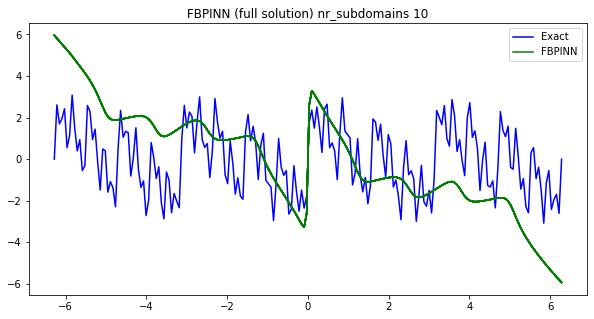

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [37]:
for nr_sub in n_subdomains:

    # Create the model
    model = FBPINN_Cos_nD(domain_extrema=domain, n_subdomains=nr_sub, overlap=overlap, sigma=sigma, n_hidden_layers=n_hidden_layers, neurons=neurons, activation_function=nn.Tanh(), n_multi_scale=n_multi_scale, w_list=w_list)

    # Train the FBPINN
    # model.to(mps_device)
    history, l1_loss = model.fit(num_points, n_epochs, verbose=False)

    l1_loss_arr.append(l1_loss)

    print("Loss: {}".format(np.min(l1_loss)))

    l1_loss_min.append(np.min(l1_loss))

    plot_solution(model, nr_sub)

    torch.save(model.state_dict(), 'models_save/scale_fbpinn_{}.pdh'.format(nr_sub))

    # Save the l1 loss in pickle
    with open("l1_loss_scale_fbpinn_{}".format(nr_sub), 'wb') as file:
        pickle.dump(l1_loss, file)

In [38]:
print(l1_loss_min)

[1.3568866]


In [30]:
model_test = FBPINN_Cos_nD(domain_extrema=domain, n_subdomains=1, overlap=overlap, sigma=sigma, n_hidden_layers=n_hidden_layers, neurons=neurons, activation_function=nn.Tanh(), n_multi_scale=n_multi_scale, w_list=w_list)
model_test.load_state_dict(torch.load("models_save/scale_fbpinn_1.pdh"))
# model_test.eval()


<All keys matched successfully>

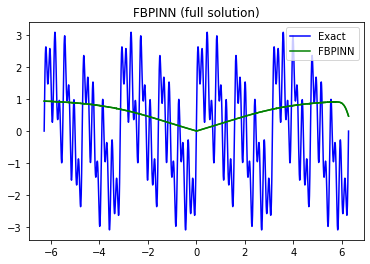

In [28]:
plot_solution(model_test) 

In [7]:
# Parameters
domain = [-2*torch.pi, 2*torch.pi]

n_multi_scale = 3
w_list = [1, 4, 15]
n_subdomains = 30
overlap = 0.3
sigma = 0.1
n_hidden_layers = 2
neurons = 16

# Create the model
fbpinn = FBPINN_Cos_nD(domain_extrema=domain, n_subdomains=n_subdomains, overlap=overlap, sigma=sigma, n_hidden_layers=n_hidden_layers, neurons=neurons, activation_function=nn.Tanh(), n_multi_scale=n_multi_scale, w_list=w_list)

# Train the FBPINN
num_points = 200*15
n_epochs = 10000

history = fbpinn.fit(num_points, n_epochs, verbose=False)

AttributeError: module 'torch' has no attribute 'pi'